In [1]:
pip install snscrape

Note: you may need to restart the kernel to use updated packages.


In [2]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Creating list to append tweet data to
tweets_list2 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('$RVLV since:2020-03-01 until:2022-03-31').get_items()):
    if i>10000:
        break
    tweets_list2.append([tweet.date, tweet.id, tweet.content, tweet.user.username])
    
# Creating a dataframe from the tweets list above
tweets_df2 = pd.DataFrame(tweets_list2, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])



In [3]:
tweets_df2

,Datetime,Tweet Id,Text,Username
0,2022-03-30 18:25:02+00:00,1509235264731983873,"Revolve Group, Inc current quarter revenue gro...",earningsflyinc
1,2022-03-30 17:26:41+00:00,1509220583867023360,"Best place for day trading, swing trading, sto...",stock4632
2,2022-03-30 03:01:59+00:00,1509002975313686532,One more thought. Following the war in Ukraine...,jablamsky
3,2022-03-30 00:28:37+00:00,1508964376791089154,"$RVLV Best room on the net, Stay turned. https...",gweolyn
4,2022-03-29 22:41:43+00:00,1508937474919260172,@MarketRebels $RVLV vertical call is doing well.,EdwardGiugliano
...,...,...,...,...
9996,2020-03-23 11:04:17+00:00,1242044490665185281,$RVLV: Revolve Group provides business update;...,Briefingcom
9997,2020-03-23 10:25:20+00:00,1242034689780658176,Revolve Group $RVLV vs. The Competition Financ...,dakotafinancial
9998,2020-03-23 10:15:45+00:00,1242032276088766465,$RVLV / Revolve Group files form 8-K - Regulat...,fintel_io
9999,2020-03-23 09:39:47+00:00,1242023226785632256,Head to Head Comparison: Revolve Group $RVLV v...,midetimes


In [4]:
#importing the necessary libraries 
import datetime
import yfinance as yf
!pip install matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

import sys
import re
import string
import json
import os

import nltk
import ssl
nltk.download('vader_lexicon')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()

from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

[nltk_data] Error loading vader_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1129)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1129)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1129)>
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1129)>


In [5]:
!pip install sklearn
from sklearn.model_selection import train_test_split
!pip install treeinterpreter
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn import svm
from sklearn.svm import SVR 

from sklearn.metrics import mean_squared_error
from math import sqrt

<AxesSubplot:title={'center':'Revolve Stock Price'}, xlabel='Date'>

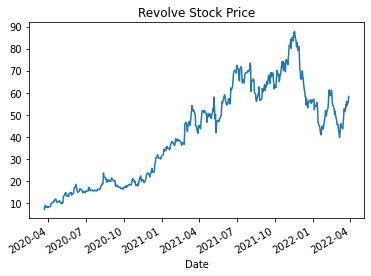

In [6]:
#Get closing stock prices printed on graph

ticker = yf.Ticker('RVLV')
rvlv_df = ticker.history(start='2020-03-23',
                    end='2022-03-30')
rvlv_df['Close'].plot(title="Revolve Stock Price")

In [7]:
#Get stock data with opening and closing prices 
rvlv_df = yf.download('RVLV',
                    start='2020-03-23',
                    end='2022-04-1',
                    progress=False,
                    )
print(rvlv_df)

rvlv_df.to_csv('RVLV_yfinance.csv')

                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2020-03-23   7.790000   8.390000   7.250000   7.300000   7.300000  1346000
2020-03-24   7.700000   8.710000   7.370000   8.560000   8.560000  1261800
2020-03-25   8.530000   9.500000   7.810000   8.980000   8.980000  2348200
2020-03-26   9.430000   9.500000   8.200000   9.190000   9.190000  1026900
2020-03-27   8.600000   8.790000   8.270000   8.300000   8.300000   646200
...               ...        ...        ...        ...        ...      ...
2022-03-25  56.310001  56.310001  53.500000  54.340000  54.340000   765300
2022-03-28  54.529999  55.990002  53.195000  55.970001  55.970001   643000
2022-03-29  57.200001  59.000000  57.200001  58.419998  58.419998   898700
2022-03-30  58.130001  58.540001  55.279999  55.419998  55.419998   533500
2022-03-31  55.389999  55.389999  53.150002  53.689999  53.689999   628700

[512 rows x 6 columns]


In [9]:
#cleaning up twitter data

#removing special characters from each tweets

tweets_df2.to_csv("Tweets.csv")

In [10]:
data = tweets_df2


#cleaning twitter data, removing special characters
cdata=pd.DataFrame(columns=['Datetime','Text'])
total=100
index=0
for index,row in data.iterrows():
    stre=row["Text"]
    my_new_string = re.sub('[^ a-zA-Z0-9]', '', stre)
    temp_df = pd.DataFrame([[data["Datetime"].iloc[index], 
                            my_new_string]], columns = ['Datetime','Text'])
    cdata = pd.concat([cdata, temp_df], axis = 0).reset_index(drop = True)
    # index=index+1
    
cdata

,Datetime,Text
0,2022-03-30 18:25:02+00:00,Revolve Group Inc current quarter revenue grow...
1,2022-03-30 17:26:41+00:00,Best place for day trading swing trading stock...
2,2022-03-30 03:01:59+00:00,One more thought Following the war in Ukraine ...
3,2022-03-30 00:28:37+00:00,RVLV Best room on the net Stay turned httpstco...
4,2022-03-29 22:41:43+00:00,MarketRebels RVLV vertical call is doing well
...,...,...
9996,2020-03-23 11:04:17+00:00,RVLV Revolve Group provides business update wi...
9997,2020-03-23 10:25:20+00:00,Revolve Group RVLV vs The Competition Financia...
9998,2020-03-23 10:15:45+00:00,RVLV Revolve Group files form 8K Regulation ...
9999,2020-03-23 09:39:47+00:00,Head to Head Comparison Revolve Group RVLV vs ...


In [13]:
#remove punctuation

def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

cdata['Tweet_punct'] = cdata['Text'].apply(lambda x: remove_punct(x))
cdata.head(10)

,Datetime,Text,Tweet_punct
0,2022-03-30 18:25:02+00:00,Revolve Group Inc current quarter revenue grow...,Revolve Group Inc current quarter revenue grow...
1,2022-03-30 17:26:41+00:00,Best place for day trading swing trading stock...,Best place for day trading swing trading stock...
2,2022-03-30 03:01:59+00:00,One more thought Following the war in Ukraine ...,One more thought Following the war in Ukraine ...
3,2022-03-30 00:28:37+00:00,RVLV Best room on the net Stay turned httpstco...,RVLV Best room on the net Stay turned httpstco...
4,2022-03-29 22:41:43+00:00,MarketRebels RVLV vertical call is doing well,MarketRebels RVLV vertical call is doing well
5,2022-03-29 18:28:44+00:00,2 httpstcohKB4JdPvuO AMZN RVLV,httpstcohKBJdPvuO AMZN RVLV
6,2022-03-29 14:49:05+00:00,RVLV Best room on the net Stay turned httpstco...,RVLV Best room on the net Stay turned httpstco...
7,2022-03-29 14:35:06+00:00,RVLV If you really want to make huge profits o...,RVLV If you really want to make huge profits o...
8,2022-03-29 07:44:45+00:00,RVLV Best room on the net Stay turned httpstco...,RVLV Best room on the net Stay turned httpstco...
9,2022-03-28 20:26:07+00:00,Revolve Group Inc current quarter revenue grow...,Revolve Group Inc current quarter revenue grow...


In [26]:
#remove stop words

import nltk
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
cdata['Tweet_nonstop'] = cdata['Tweet_punct'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

cdata.head()

,Datetime,Text,Tweet_punct,Tweet_nonstop,Tweet_stemmed,Dates,Time
0,2022-03-30 18:25:02+00:00,Revolve Group Inc current quarter revenue grow...,Revolve Group Inc current quarter revenue grow...,Revolve Group Inc current quarter revenue grow...,"[r, e, v, o, l, v, e, , g, r, o, u, p, , i, ...",2022-03-30,18:25:02
1,2022-03-30 17:26:41+00:00,Best place for day trading swing trading stock...,Best place for day trading swing trading stock...,Best place day trading swing trading stocks op...,"[b, e, s, t, , p, l, a, c, e, , d, a, y, , ...",2022-03-30,17:26:41
2,2022-03-30 03:01:59+00:00,One more thought Following the war in Ukraine ...,One more thought Following the war in Ukraine ...,One thought Following war Ukraine RH saw point...,"[o, n, e, , t, h, o, u, g, h, t, , f, o, l, ...",2022-03-30,03:01:59
3,2022-03-30 00:28:37+00:00,RVLV Best room on the net Stay turned httpstco...,RVLV Best room on the net Stay turned httpstco...,RVLV Best room net Stay turned httpstcouatlSwHw,"[r, v, l, v, , b, e, s, t, , r, o, o, m, , ...",2022-03-30,00:28:37
4,2022-03-29 22:41:43+00:00,MarketRebels RVLV vertical call is doing well,MarketRebels RVLV vertical call is doing well,MarketRebels RVLV vertical call well,"[m, a, r, k, e, t, r, e, b, e, l, s, , r, v, ...",2022-03-29,22:41:43


In [25]:
#separating datetime into 2 columns, date and time

cdata['Dates'] = pd.to_datetime(cdata['Datetime']).dt.date
cdata['Time'] = pd.to_datetime(cdata['Datetime']).dt.time

cdata

,Datetime,Text,Tweet_punct,Tweet_nonstop,Tweet_stemmed,Dates,Time
0,2022-03-30 18:25:02+00:00,Revolve Group Inc current quarter revenue grow...,Revolve Group Inc current quarter revenue grow...,Revolve Group Inc current quarter revenue grow...,"[r, e, v, o, l, v, e, , g, r, o, u, p, , i, ...",2022-03-30,18:25:02
1,2022-03-30 17:26:41+00:00,Best place for day trading swing trading stock...,Best place for day trading swing trading stock...,Best place day trading swing trading stocks op...,"[b, e, s, t, , p, l, a, c, e, , d, a, y, , ...",2022-03-30,17:26:41
2,2022-03-30 03:01:59+00:00,One more thought Following the war in Ukraine ...,One more thought Following the war in Ukraine ...,One thought Following war Ukraine RH saw point...,"[o, n, e, , t, h, o, u, g, h, t, , f, o, l, ...",2022-03-30,03:01:59
3,2022-03-30 00:28:37+00:00,RVLV Best room on the net Stay turned httpstco...,RVLV Best room on the net Stay turned httpstco...,RVLV Best room net Stay turned httpstcouatlSwHw,"[r, v, l, v, , b, e, s, t, , r, o, o, m, , ...",2022-03-30,00:28:37
4,2022-03-29 22:41:43+00:00,MarketRebels RVLV vertical call is doing well,MarketRebels RVLV vertical call is doing well,MarketRebels RVLV vertical call well,"[m, a, r, k, e, t, r, e, b, e, l, s, , r, v, ...",2022-03-29,22:41:43
...,...,...,...,...,...,...,...
9996,2020-03-23 11:04:17+00:00,RVLV Revolve Group provides business update wi...,RVLV Revolve Group provides business update wi...,RVLV Revolve Group provides business update wi...,"[r, v, l, v, , r, e, v, o, l, v, e, , g, r, ...",2020-03-23,11:04:17
9997,2020-03-23 10:25:20+00:00,Revolve Group RVLV vs The Competition Financia...,Revolve Group RVLV vs The Competition Financia...,Revolve Group RVLV vs The Competition Financia...,"[r, e, v, o, l, v, e, , g, r, o, u, p, , r, ...",2020-03-23,10:25:20
9998,2020-03-23 10:15:45+00:00,RVLV Revolve Group files form 8K Regulation ...,RVLV Revolve Group files form K Regulation F...,RVLV Revolve Group files form K Regulation FD ...,"[r, v, l, v, , r, e, v, o, l, v, e, , g, r, ...",2020-03-23,10:15:45
9999,2020-03-23 09:39:47+00:00,Head to Head Comparison Revolve Group RVLV vs ...,Head to Head Comparison Revolve Group RVLV vs ...,Head Head Comparison Revolve Group RVLV vs Its...,"[h, e, a, d, , h, e, a, d, , c, o, m, p, a, ...",2020-03-23,09:39:47


In [27]:
#choosing the 2 columns that are needed, dates and tweet_nonstop
tweets = cdata[cdata.columns[cdata.columns.isin(['Dates', 'Tweet_nonstop'])]]

#adding a 'price' column in our dataframe and fetching the stock price as per date in the df
tweets['Prices']=""

tweets

/var/folders/07/j260f3x91lxby88hm9cgplww0000gn/T/ipykernel_53476/1564652388.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['Prices']=""


,Tweet_nonstop,Dates,Prices
0,Revolve Group Inc current quarter revenue grow...,2022-03-30,
1,Best place day trading swing trading stocks op...,2022-03-30,
2,One thought Following war Ukraine RH saw point...,2022-03-30,
3,RVLV Best room net Stay turned httpstcouatlSwHw,2022-03-30,
4,MarketRebels RVLV vertical call well,2022-03-29,
...,...,...,...
9996,RVLV Revolve Group provides business update wi...,2020-03-23,
9997,Revolve Group RVLV vs The Competition Financia...,2020-03-23,
9998,RVLV Revolve Group files form K Regulation FD ...,2020-03-23,
9999,Head Head Comparison Revolve Group RVLV vs Its...,2020-03-23,


In [28]:
#revolve stock data

read_stock_p = pd.read_csv('/Users/ragave/RVLV_yfinance.csv')
read_stock_p

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-23,7.790000,8.390000,7.250000,7.300000,7.300000,1346000
1,2020-03-24,7.700000,8.710000,7.370000,8.560000,8.560000,1261800
2,2020-03-25,8.530000,9.500000,7.810000,8.980000,8.980000,2348200
3,2020-03-26,9.430000,9.500000,8.200000,9.190000,9.190000,1026900
4,2020-03-27,8.600000,8.790000,8.270000,8.300000,8.300000,646200
...,...,...,...,...,...,...,...
507,2022-03-25,56.310001,56.310001,53.500000,54.340000,54.340000,765300
508,2022-03-28,54.529999,55.990002,53.195000,55.970001,55.970001,643000
509,2022-03-29,57.200001,59.000000,57.200001,58.419998,58.419998,898700
510,2022-03-30,58.130001,58.540001,55.279999,55.419998,55.419998,533500


In [29]:
#get the stock prices for each corresponding date and put it in the df

indx=0
for i in range (0,len(tweets)):
    for j in range (0,len(read_stock_p)):
        get_tweet_date=tweets.Dates.iloc[i]
        get_stock_date=read_stock_p.Date.iloc[j]
        if(str(get_stock_date)==str(get_tweet_date)):
            #print(get_stock_date," ",get_tweet_date)
            #ccdata.set_value(i,'Prices',int(read_stock_p.Close[j]))
            tweets['Prices'].iloc[i] = int(read_stock_p.Close[j])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [30]:
tweets

,Tweet_nonstop,Dates,Prices
0,Revolve Group Inc current quarter revenue grow...,2022-03-30,55
1,Best place day trading swing trading stocks op...,2022-03-30,55
2,One thought Following war Ukraine RH saw point...,2022-03-30,55
3,RVLV Best room net Stay turned httpstcouatlSwHw,2022-03-30,55
4,MarketRebels RVLV vertical call well,2022-03-29,58
...,...,...,...
9996,RVLV Revolve Group provides business update wi...,2020-03-23,7
9997,Revolve Group RVLV vs The Competition Financia...,2020-03-23,7
9998,RVLV Revolve Group files form K Regulation FD ...,2020-03-23,7
9999,Head Head Comparison Revolve Group RVLV vs Its...,2020-03-23,7


In [31]:
#Prices are fetched but some entires are blank as close price might not be available for that day due to 
#some reason, so we take the mean for the close price and put it in the blank value 

mean=0
summ=0
count=0
for i in range(0,len(tweets)):
    if(tweets.Prices.iloc[i]!=""):
        summ=summ+int(tweets.Prices.iloc[i])
        count=count+1
mean=summ/count
for i in range(0,len(tweets)):
    if(tweets.Prices.iloc[i]==""):
        tweets.Prices.iloc[i]=int(mean)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [32]:
tweets

,Tweet_nonstop,Dates,Prices
0,Revolve Group Inc current quarter revenue grow...,2022-03-30,55
1,Best place day trading swing trading stocks op...,2022-03-30,55
2,One thought Following war Ukraine RH saw point...,2022-03-30,55
3,RVLV Best room net Stay turned httpstcouatlSwHw,2022-03-30,55
4,MarketRebels RVLV vertical call well,2022-03-29,58
...,...,...,...
9996,RVLV Revolve Group provides business update wi...,2020-03-23,7
9997,Revolve Group RVLV vs The Competition Financia...,2020-03-23,7
9998,RVLV Revolve Group files form K Regulation FD ...,2020-03-23,7
9999,Head Head Comparison Revolve Group RVLV vs Its...,2020-03-23,7


In [33]:
#change prices column into int 

tweets['Prices'] = tweets['Prices'].apply(np.int64)

/var/folders/07/j260f3x91lxby88hm9cgplww0000gn/T/ipykernel_53476/1756119170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['Prices'] = tweets['Prices'].apply(np.int64)


In [34]:
#create columns needed for sentiment analysis 

tweets["Comp"] = ''
tweets["Negative"] = ''
tweets["Neutral"] = ''
tweets["Positive"] = ''
tweets

/var/folders/07/j260f3x91lxby88hm9cgplww0000gn/T/ipykernel_53476/3315149626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets["Comp"] = ''
/var/folders/07/j260f3x91lxby88hm9cgplww0000gn/T/ipykernel_53476/3315149626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets["Negative"] = ''
/var/folders/07/j260f3x91lxby88hm9cgplww0000gn/T/ipykernel_53476/3315149626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,Tweet_nonstop,Dates,Prices,Comp,Negative,Neutral,Positive
0,Revolve Group Inc current quarter revenue grow...,2022-03-30,55,,,,
1,Best place day trading swing trading stocks op...,2022-03-30,55,,,,
2,One thought Following war Ukraine RH saw point...,2022-03-30,55,,,,
3,RVLV Best room net Stay turned httpstcouatlSwHw,2022-03-30,55,,,,
4,MarketRebels RVLV vertical call well,2022-03-29,58,,,,
...,...,...,...,...,...,...,...
9996,RVLV Revolve Group provides business update wi...,2020-03-23,7,,,,
9997,Revolve Group RVLV vs The Competition Financia...,2020-03-23,7,,,,
9998,RVLV Revolve Group files form K Regulation FD ...,2020-03-23,7,,,,
9999,Head Head Comparison Revolve Group RVLV vs Its...,2020-03-23,7,,,,


In [257]:
#sentiment analysis 
#values for compound, negative, neutral, and positive sentiment

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()
#go through each row and retreive sentiment values
for indexx, row in tweets.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', tweets.loc[indexx, 'Tweet_nonstop'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        tweets['Comp'].iloc[indexx] = sentence_sentiment['compound']
        tweets['Negative'].iloc[indexx] = sentence_sentiment['neg']
        tweets['Neutral'].iloc[indexx] = sentence_sentiment['neu']
        tweets['Positive'].iloc[indexx] = sentence_sentiment['pos']
        # ccdata.set_value(indexx, 'Comp', sentence_sentiment['pos'])
        # ccdata.set_value(indexx, 'Negative', sentence_sentiment['neg'])
        # ccdata.set_value(indexx, 'Neutral', sentence_sentiment['neu'])
        # ccdata.set_value(indexx, 'Positive', sentence_sentiment['pos'])
    except TypeError:
        print (stocks_dataf.loc[indexx, 'Tweet_nonstop'])
        print (indexx)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [258]:
tweets

,Tweet_nonstop,Dates,Prices,Comp,Negative,Neutral,Positive,sentiment
0,Revolve Group Inc current quarter revenue grow...,2022-03-30,55,0.3818,0.0,0.822,0.178,0.3818
1,Best place day trading swing trading stocks op...,2022-03-30,55,0.6369,0.0,0.792,0.208,0.6369
2,One thought Following war Ukraine RH saw point...,2022-03-30,55,-0.5267,0.295,0.553,0.153,-0.5267
3,RVLV Best room net Stay turned httpstcouatlSwHw,2022-03-30,55,0.6369,0.0,0.588,0.412,0.6369
4,MarketRebels RVLV vertical call well,2022-03-29,58,0.2732,0.0,0.656,0.344,0.2732
...,...,...,...,...,...,...,...,...
9996,RVLV Revolve Group provides business update wi...,2020-03-23,7,0.0,0.0,1.0,0.0,0.0000
9997,Revolve Group RVLV vs The Competition Financia...,2020-03-23,7,0.0,0.0,1.0,0.0,0.0000
9998,RVLV Revolve Group files form K Regulation FD ...,2020-03-23,7,0.2732,0.0,0.905,0.095,0.2732
9999,Head Head Comparison Revolve Group RVLV vs Its...,2020-03-23,7,0.0,0.0,1.0,0.0,0.0000


% of positive tweets=  43.445655434456555
% of negative tweets=  10.96890310968903
% of neutral tweets=  45.585441455854415


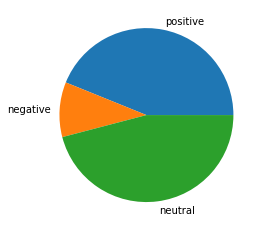

In [259]:
import matplotlib.pyplot as mlpt

# calculate the percentage of positive and negative tweets
posi=0
nega=0
neutral = 0
for i in range (0,len(data)):
    get_val = tweets.Comp[i]
    if(float(get_val)<(0)):
        nega=nega+1
    if(float(get_val>(0))):
        posi=posi+1
    if(float(get_val)==(0)):
        neutral=neutral+1

#calculate percentage of positive, negative, and neutral tweets
posper=(posi/(len(tweets)))*100
negper=(nega/(len(tweets)))*100
neutralper=(neutral/(len(tweets)))*100

#create pie chart 
arr=np.asarray([posper,negper,neutralper], dtype=int)
plt.figure()
plt.pie(arr,labels=['positive','negative', 'neutral'])
plt.plot()

print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
print("% of neutral tweets= ",neutralper)

In [260]:
# dataframe with the necessary columns to conduct ML

revolve_ts=tweets[['Dates','Prices','Comp','Negative','Neutral','Positive']].copy()


/var/folders/07/j260f3x91lxby88hm9cgplww0000gn/T/ipykernel_53476/1435136228.py:22: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



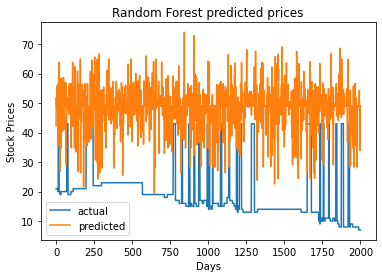




RMSE value for Random Forest Model : 
31.361310416874442


In [261]:
#Method for stock price prediction using random forest model

#split 80/20 training and test dataset
df = revolve_ts
train, test = train_test_split(df, shuffle=False, test_size=0.2)

#create train
sentiment_score_list_train = []
for Dates, row in train.T.iteritems():
    sentiment_score = np.asarray([df.loc[Dates, 'Negative'],  df.loc[Dates, 'Neutral'], df.loc[Dates, 'Positive']])
    sentiment_score_list_train.append(sentiment_score)
    numpy_df_train = np.asarray(sentiment_score_list_train)

#create test
sentiment_score_list_test = []
for Dates, row in test.T.iteritems():
    sentiment_score = np.asarray([df.loc[Dates, 'Negative'],  df.loc[Dates, 'Neutral'], df.loc[Dates, 'Positive']])
    sentiment_score_list_test.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list_test)

#prices for train and test
y_train = pd.DataFrame(train['Prices'])
y_test = pd.DataFrame(test['Prices'])

#fit the random forest model
rf = RandomForestRegressor()
rf.fit(numpy_df_train, y_train)
prediction, bias, contributions = ti.predict(rf, numpy_df_test)

#create the plot
print("\n\n")
plt.figure()
plt.plot(test['Prices'].iloc[:].values)
plt.plot(prediction.flatten())
plt.title('Random Forest predicted prices')
plt.ylabel('Stock Prices')
plt.xlabel('Days')
plt.legend(['actual', 'predicted'])
plt.show()

#print the RMSE value
print("\n\n")
print("RMSE value for Random Forest Model : ")
rmse = sqrt(mean_squared_error(y_test, prediction.flatten()))
print(rmse)

In [262]:
#import libraries
from sklearn.metrics import r2_score
from scipy.stats import spearmanr
from scipy.stats.stats import pearsonr 

#predicted values
predicted_train = rf.predict(numpy_df_train)
predicted_test = rf.predict(numpy_df_test)

#correlation values for r2 and spearman
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
#pearson = pearsonr(y_test, predicted_test)

#pearson correlation
ytest_0 = rf.estimators_[0].predict(numpy_df_test) 
ytest_1 = rf.estimators_[1].predict(numpy_df_test) 
pearson = pearsonr(ytest_0, ytest_1)[0]

#print(f'Out-of-bag R-2 score estimate: {rf.oob_score_:>5.3}')
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson}')

Test data R-2 score: -10.3
Test data Spearman correlation: 0.0133
Test data Pearson correlation: 0.2967979029742117


/var/folders/07/j260f3x91lxby88hm9cgplww0000gn/T/ipykernel_53476/1748516822.py:3: DeprecationWarning:

Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.



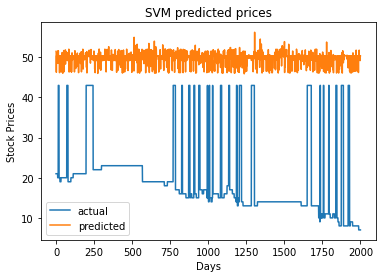




RMSE value for Support Vector Regression Model : 
31.923104610593345





In [265]:
#Method for stock price prediction using SVM

#split 80/20 training and test dataset
df = revolve_ts
train, test = train_test_split(df, shuffle=False, test_size=0.2)

#train dataset
sentiment_score_list_train = []
for Dates, row in train.T.iteritems():
    sentiment_score = np.asarray([df.loc[Dates, 'Negative'],  df.loc[Dates, 'Neutral'], df.loc[Dates, 'Positive']])
    sentiment_score_list_train.append(sentiment_score)
    numpy_df_train = np.asarray(sentiment_score_list_train)

#test dataset
sentiment_score_list_test = []
for Dates, row in test.T.iteritems():
    sentiment_score = np.asarray([df.loc[Dates, 'Negative'],  df.loc[Dates, 'Neutral'], df.loc[Dates, 'Positive']])
    sentiment_score_list_test.append(sentiment_score)
    numpy_df_test = np.asarray(sentiment_score_list_test)

#prices for train and test
y_train = pd.DataFrame(train['Prices'])
y_test = pd.DataFrame(test['Prices'])

#fit the svm model
svr_rbf = SVR(kernel='rbf', C=1e6, gamma=0.1)
svr_rbf.fit(numpy_df_train, y_train.values.flatten())
output_test_svm = svr_rbf.predict(numpy_df_test)

#create the plot
plt.figure()
plt.plot(test['Prices'].iloc[:].values)
plt.plot(output_test_svm)
plt.title('SVM predicted prices')
plt.ylabel('Stock Prices')
plt.xlabel('Days')
plt.legend(['actual', 'predicted'])
plt.show()

#print the RMSE value
print("\n\n")
print("RMSE value for Support Vector Regression Model : ")
rmse = sqrt(mean_squared_error(y_test, output_test_svm))
print(rmse)
print("\n\n")

In [266]:
predicted_train = svr_rbf.predict(numpy_df_train)
predicted_test = svr_rbf.predict(numpy_df_test)

test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
#pearson = pearsonr(y_test, predicted_test)

#print(f'Out-of-bag R-2 score estimate: {rf.oob_score_:>5.3}')
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
#print(f'Test data Pearson correlation: {pearson}')

Test data R-2 score: -10.7
Test data Spearman correlation: 0.0162


In [246]:
import datetime
from datetime import datetime

measurement="compound"

# Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Getting the sentiment score
tweets['sentiment'] = tweets['Tweet_nonstop'].apply(lambda x: sia.polarity_scores(x)[measurement])

# Creating a DF with the average sentiment score each day
sent_df = tweets.groupby('Dates')['sentiment'].mean().reset_index()

# Converting the dates to datetime
sent_df['Dates'] =  pd.to_datetime(sent_df['Dates'], format="%Y-%m-%d")
    
sent_df

,Dates,sentiment
0,2020-03-23,0.125183
1,2020-03-24,-0.052087
2,2020-03-25,0.042040
3,2020-03-26,-0.045553
4,2020-03-27,-0.254560
...,...,...
721,2022-03-25,0.059333
722,2022-03-27,0.576100
723,2022-03-28,0.301867
724,2022-03-29,0.454060


In [242]:
# Setting the stock
stock = yf.Ticker('RVLV')

# Getting historical prices
stock_df = stock.history(start='2020-03-22', end='2022-03-30', interval="1d")[['Close']]

# Getting the daily percent returns
stock_df = stock_df.pct_change(1).dropna()
    
# Some reformatting
stock_df = stock_df.reset_index().rename(
columns={"Date": "date", 
         "Close": "returns"})


# Converting the dates to datetime
stock_df['date'] =  pd.to_datetime(stock_df['date'], format="%Y-%m-%d")

stock_df

,date,returns
0,2020-03-24,0.172603
1,2020-03-25,0.049065
2,2020-03-26,0.023385
3,2020-03-27,-0.096844
4,2020-03-30,0.013253
...,...,...
504,2022-03-23,-0.012103
505,2022-03-24,0.041582
506,2022-03-25,-0.031545
507,2022-03-28,0.029996


In [247]:
stock_df = stock_df.rename(columns={'date': 'Dates'})

In [248]:
sent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Dates      726 non-null    datetime64[ns]
 1   sentiment  726 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.5 KB


In [249]:
# Merging the two DF
comb_df = sent_df.merge(stock_df, how='outer', sort=True)
# Shifting the sentiment scores 1 day to compensate for lookahead bias
comb_df['sentiment'] = comb_df['sentiment'].shift(1)

comb_df

,Dates,sentiment,returns
0,2020-03-23,NaN,NaN
1,2020-03-24,0.125183,0.172603
2,2020-03-25,-0.052087,0.049065
3,2020-03-26,0.042040,0.023385
4,2020-03-27,-0.045553,-0.096844
...,...,...,...
724,2022-03-25,0.333353,-0.031545
725,2022-03-27,0.059333,NaN
726,2022-03-28,0.576100,0.029996
727,2022-03-29,0.301867,0.043773


In [250]:
import plotly.express as px

In [255]:
# Dropping NAs so they are not compared
drop_df = comb_df.dropna()

# Converting the dates to datetime
drop_df['Dates'] =  pd.to_datetime(drop_df['Dates'], format="%Y-%m-%d")

# Comparing matches
match = (drop_df['sentiment'].apply(lambda x: x>0)==drop_df['returns'].apply(lambda x: x>0))


# Counting instances where they match
match = match.value_counts().rename({False: "Didn't predict return",
                                         True: "Successfully predicted return"}).to_frame()
    
# Visualizing matches in sentiment and return
fig = px.bar(match,
        x=0,
        y=match.index,
        color=match.index,
        title="Instances when Sentiment predicts Return",
        labels={"index": "Prediction",
                "0": "Count"}
    )

fig.show()
    
# Visualizing the sentiment and price
fig = px.bar(
        comb_df,
        x='Dates',
        y=['returns', 'sentiment'],
        barmode='group',
        title=f"Returns & Sentiment over Time for RVLV"
    )
    
fig.show()

/var/folders/07/j260f3x91lxby88hm9cgplww0000gn/T/ipykernel_53476/61437050.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

